In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import data_array as data_array
import disfa as disfa
import numpy as np
from scipy import ndimage
import scipy

In [2]:
# use the first subject as example. all availabe subjects are stored in disfa.disfa_id_subj_all
id_sub = 5
# load all AU targets from subject 1
targets = disfa.disfa['AUall'][id_sub][:]

[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN005_labels_AUall.mat


In [3]:
# targets contain 4845 frames and 12 AUs
# see http://www.engr.du.edu/mmahoor/DISFAContent.htm for the description of the AUs, the order is ascending
targets.shape

(4845, 12)

In [4]:
#load all images from subject 1
images = disfa.disfa['images'][id_sub][:]

[FileHDF5] read file /home/luka/Documents/DISFA/Features/images/SN005_features_images.mat


In [5]:
# images contain 4845 frames with images of size 128 x 118 (x and y axis are swapped)
images.shape

(4845, 118, 128)

annotated AUs are [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  2.  0.  0.]
(102, 71)


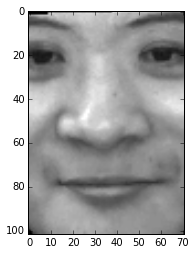

2304


AttributeError: 'int' object has no attribute 'shape'

In [46]:
i = 255
plt.figure()
# image = scipy.misc.imresize(images[i,118/2:,:],[118,128])
# print the AU annotations and plot the image of the first sample
print('annotated AUs are {}'.format(targets[i,:]))
x,y = images[0,:,:].shape
side_crop = 0.2
l = int(0 + x*side_crop)
r = int(x - x*side_crop)
top_crop = 0.0
bottom_crop = 0.2
u = int(0 + y*top_crop)
d = int(y - y*bottom_crop)
im = images[i,u:d,l:r]
plt.imshow(im, cmap='gray')
print im.shape
plt.show()
print 48**2
print x.shape[1]*x.shape[0]

In [ ]:
# as convenience function to load data from all subjects, use:
targets_all, id_array = data_array.IndicesCollection(disfa.disfa_ic_all).getitem(disfa.disfa['AUall'])

In [ ]:
# id_array contains the subjects and frame number of each sample:
id_array[0,:]
#this means the first sample is from subject 1 frame 0

In [ ]:
a = 5000
print 'subject', id_array[a,0], 'frame', id_array[a,1]
print targets_all[a]
print targets_all.shape

In [ ]:
import sPickle
import gzip
sPickle.s_dump(all_images, gzip.open( "disfa_images.p", "wb" ) )
sPickle.s_dump((targets_all,id_array), gzip.open( "disfa_labels.p", "wb" ) )

In [ ]:
print 'done!'

In [ ]:
import pickle
import gzip

#store the object
myObject = {'a':'blah','b':range(10)}
f = gzip.open('testPickleFile.pklz','wb')
pickle.dump(myObject,f)
f.close()

#restore the object
f = gzip.open('testPickleFile.pklz','rb')
myNewObject = pickle.load(f)
f.close()

print myObject
print myNewObject